In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/mini_/dataset")))

['test', 'train']


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/mini_/dataset/train',
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/mini_/dataset/test',
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary'
)


Found 455 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [ ]:
batch_size = 32
# Assuming `classifier` is your model defined earlier

# Training the model
model_info = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=30,
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/30
15/15 [==============================] - 147s 10s/step - loss: 1.1924 - accuracy: 0.5538 - val_loss: 0.6892 - val_accuracy: 0.5077
Epoch 2/30
15/15 [==============================] - 54s 3s/step - loss: 0.6824 - accuracy: 0.5802 - val_loss: 0.7270 - val_accuracy: 0.5077
Epoch 3/30
15/15 [==============================] - 55s 3s/step - loss: 0.6382 - accuracy: 0.6352 - val_loss: 0.7495 - val_accuracy: 0.5385
Epoch 4/30
15/15 [==============================] - 55s 4s/step - loss: 0.5924 - accuracy: 0.6923 - val_loss: 0.7176 - val_accuracy: 0.6308
Epoch 5/30
15/15 [==============================] - 55s 4s/step - loss: 0.5657 - accuracy: 0.7077 - val_loss: 0.6942 - val_accuracy: 0.5846
Epoch 6/30
15/15 [==============================] - 50s 3s/step - loss: 0.5273 - accuracy: 0.7275 - val_loss: 0.6426 - val_accuracy: 0.6000
Epoch 7/30
15/15 [==============================] - 50s 3s/step - loss: 0.4957 - accuracy: 0.7560 - val_loss: 0.6429 - val_accuracy: 0.5846
Epoch 8/30
15/15 [

In [ ]:
classifier.save('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2


In [ ]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')
print("model loaded")

model loaded


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/mini_/dataset/test/class1/Im263.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 148ms/step
Glaucoma


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/mini_/dataset/test/class0/Im181.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 48ms/step
Not Glaucoma


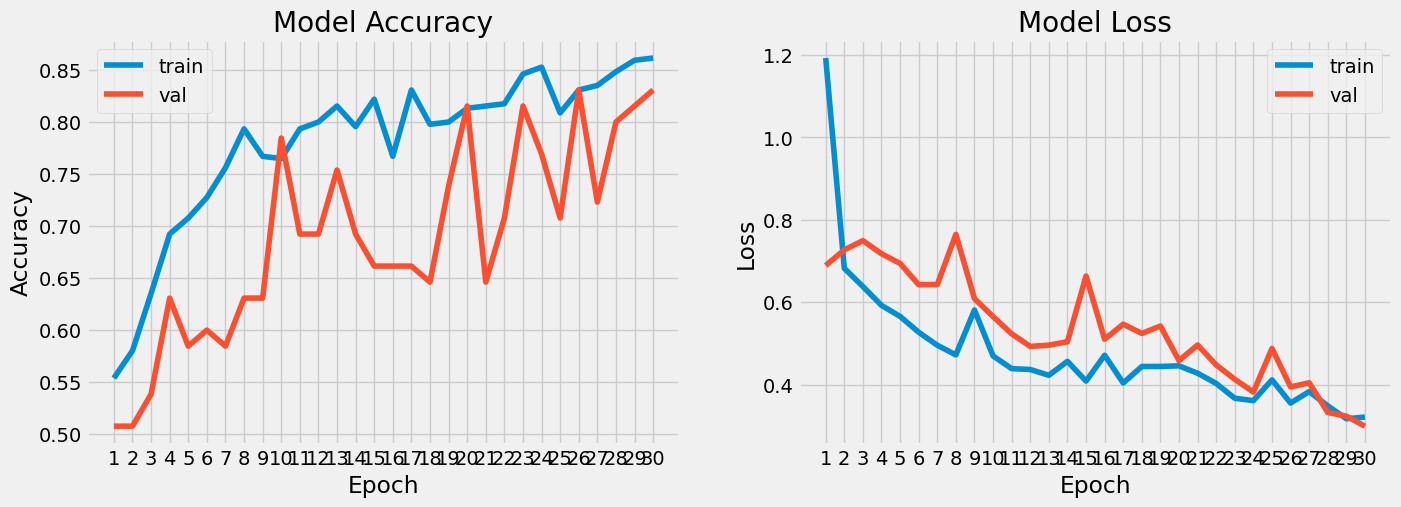

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # Summarize history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1))
    axs[0].legend(['train', 'val'], loc='best')
    # Summarize history for loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
# Assuming model_info contains the training history
# Call plot_model_history with model_info
plot_model_history(model_info)